# El tamaño de las ciudades

La distribución de la población de las ciudades es un tema de interés económico, demográfico y de sostenibilidad. Se dice que la distribución del tamaño de las ciudades sigue una [distribución de Zipf](https://en.wikipedia.org/wiki/Zipf's_law). 

## Obteniendo los datos

Podemos obtener datos del censo de EEUU en esta dirección:
http://www.census.gov/popest/data/cities/totals/2014/SUB-EST2014.html

Grabamos el fichero a disco convirtiendo previamente, dado que la cadena que nos devuelve requests es Unicode.

In [1]:
import requests as rq
url = "http://www.census.gov/popest/data/cities/totals/2014/files/SUB-EST2014_ALL.csv"
c = rq.get(url)
type(c.text)
f = open("ciudades.csv", "w")
f.write(c.text.encode("utf-8"))
f.close()
%ls

El tamaño de las ciudades.ipynb    bloque5_guia.pdf
Using statmodels.ipynb             ciudades.csv
bloque5.zip                        ciudades.txt
bloque5_guia.docx                  ejemplo/


In [2]:
import pandas as pd
ciudades = pd.read_csv("ciudades.csv")
ciudades.head(3)

,SUMLEV,STATE,COUNTY,PLACE,COUSUB,CONCIT,PRIMGEO_FLAG,FUNCSTAT,NAME,STNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
0,40,1,0,0,0,0,0,A,Alabama,Alabama,4779736,4780127,4785822,4801695,4817484,4833996,4849377
1,162,1,0,124,0,0,0,A,Abbeville city,Alabama,2688,2688,2681,2685,2649,2636,2624
2,162,1,0,460,0,0,0,A,Adamsville city,Alabama,4522,4522,4518,4497,4474,4451,4435


Vemos que "NAME" parece ser el nombre de la ciudad y en "CENSUS2010POP" tenemos un censo que no es una estimación. 

## Limpiando los datos

Tomamos solamente las columnas que nos interesan, y las ordenamos.

In [3]:
cols = ["NAME", "CENSUS2010POP"]
data = ciudades[cols].copy()
#implace sobre escribe el df original
data.sort_values(by="CENSUS2010POP", ascending=False, inplace=True)
data.head(3)

,NAME,CENSUS2010POP
17433,Balance of Prairie township,A
78276,Harrison village (pt.),A
72284,Providence Village town,A


Vemos que había valores no numéricos. Tenemos que eliminarlos.

In [4]:
print(data.CENSUS2010POP.dtype)
data.CENSUS2010POP.unique()

object


array(['A', '9998', '99967', ..., '10', '1', '0'], dtype=object)

El único valor no numérico es "A" por lo que podemos eliminarlo fácilmente y convertir los valores. También tenemos que eliminar los valores cero.

In [5]:
import numpy as np
#eliminamos los registros comn A
data = data[data.CENSUS2010POP <> "A"]
#se convierte a enteros
data.CENSUS2010POP = data.CENSUS2010POP.astype(np.int32)


In [6]:
#hay pueblos con poblacion 0 se quitan
data = data[data.CENSUS2010POP > 0]

In [7]:
# el implace sobre escribe el data frame original
#se ordena por poblacion y se agrega columna con indice ordenado
data.sort_values(by="CENSUS2010POP", ascending=False, inplace=True)
data["RANK"] = range(1,data.CENSUS2010POP.size+1)
data.head(5)

,NAME,CENSUS2010POP,RANK
2845,California,37253956,1
71399,Texas,25145561,2
46373,New York,19378102,3
5026,Florida,18801310,4
7937,Illinois,12830632,5


## Dibujando la distribución

/Users/msicilia/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


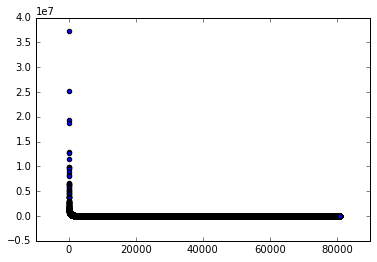

In [8]:
##hay unas pocas ciudades con muchos habitantes, y lugo deciende muy rapido
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(data.RANK, data.CENSUS2010POP)

Mejor utilizamos un log-log plot

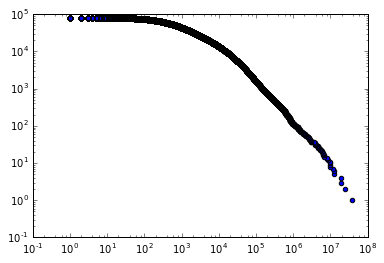

In [9]:
#se dibuja de otra manera para verlo mejor, se cambia la escala, la ley se cumple solo para ciertas ciudades
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.set_xscale('log')
plt.scatter( data.CENSUS2010POP, data.RANK, )

http://io9.com/the-mysterious-law-that-governs-the-size-of-your-city-1479244159

http://stackoverflow.com/questions/12037494/curve-fitting-zipf-distribution-matplotlib-python 